In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
from shapely.geometry import Point
from fiona.crs import from_epsg
import geopandas as gpd
import pysal as ps

Populating the interactive namespace from numpy and matplotlib


In [4]:
cd.head()

,id,name,type,validSince,validUntil,$.data.uuid,$.data.pageNum,$.data.bbox,$.data.text,$.data.occupation,$.data.locations,$.data.locations[0].value,$.data.locations[1].value,$.data.geocoded,$.data.geocoded[0].id,$.data.geocoded[0].streetId,$.data.geocoded[1].id,$.data.geocoded[1].streetId,geometry
0,1849-1850.344.147-117-1739-137,nee ae,st:Person,1849,1850,NaN,344,"[147,117,1739,137]",nee ae e e 9 nna ___ ___ ___ 2222020,NaN,"[{""value"":""e e 9 nna ___ ___ ___ 2222020""}]",e e 9 nna ___ ___ ___ 2222020,NaN,[],NaN,NaN,NaN,NaN,NaN
1,1849-1850.344.142-138-781-169,Pope James,st:Person,1849,1850,NaN,344,"[142,138,781,169]","Pope James, mason, r. 72 Grove (",mason,"[{""value"":""72 Grove ("",""labels"":[""r""]}]",72 Grove (,NaN,"[{""id"":""addresses/116808-1"",""name"":""72 Grove S...",addresses/116808-1,nyc-streets/859-grove-street,NaN,NaN,"{""type"":""Point"",""coordinates"":[-74.00276988744..."
2,1849-1850.344.140-170-816-202,Pope John W,st:Person,1849,1850,NaN,344,"[140,170,816,202]","Pope John W. grocer, 130 Av. 6, h. 130 Av. 6",grocer,"[{""value"":""130 Av . 6""},{""value"":""130 Av . 6"",...",130 Av . 6,130 Av . 6,[],NaN,NaN,NaN,NaN,NaN
3,1849-1850.344.141-203-680-234,Pope Joseph,st:Person,1849,1850,NaN,344,"[141,203,680,234]","Pope Joseph, soda water, 51 Bowery",soda water,"[{""value"":""51 Bowery""}]",51 Bowery,NaN,"[{""id"":""addresses/89337-1"",""name"":""51 Bowery"",...",addresses/89337-1,nyc-streets/859-bowery,NaN,NaN,"{""type"":""Point"",""coordinates"":[-73.99623423814..."
4,1849-1850.344.143-235-785-268,Pope John,st:Person,1849,1850,NaN,344,"[143,235,785,268]","Pope John. (col'd) porter, W. 29th n. Av. 8",(col'd) porter,"[{""value"":""W . 29th n . Av . 8""}]",W . 29th n . Av . 8,NaN,[],NaN,NaN,NaN,NaN,NaN


In [5]:
cd_subset = cd[['name' , 'validSince','validUntil' , '$.data.occupation' , 'geometry']]

In [10]:
cd_subset.count()

name                 4707899
validSince           4723370
validUntil           4723370
$.data.occupation    4304638
geometry             1326048
dtype: int64

In [9]:
cd_subset[cd['geometry'].notnull() == True].shape

(1326048, 5)

In [11]:
cd_subset.head()

,name,validSince,validUntil,$.data.occupation,geometry
0,nee ae,1849,1850,NaN,NaN
1,Pope James,1849,1850,mason,"{""type"":""Point"",""coordinates"":[-74.00276988744..."
2,Pope John W,1849,1850,grocer,NaN
3,Pope Joseph,1849,1850,soda water,"{""type"":""Point"",""coordinates"":[-73.99623423814..."
4,Pope John,1849,1850,(col'd) porter,NaN


In [21]:
names_df = cd[['name']]

In [22]:
names_df[names_df['name'].isnull() == False].shape

(4707899, 1)

In [ ]:
names_df = cd['name'].str.split(expand= True)

In [13]:
names_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,nee,ae,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Pope,James,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Pope,John,W,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Pope,Joseph,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Pope,John,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [14]:
names_df.rename(columns={0: 'LastName', 1: 'FirstName', 2: 'MiddleName'}, inplace=True)

In [15]:
fullnames_df = names_df[['LastName', 'FirstName']]
fullnames_df.head()

,LastName,FirstName
0,nee,ae
1,Pope,James
2,Pope,John
3,Pope,Joseph
4,Pope,John


In [18]:
fullnames_year = pd.concat([fullnames_df,cd[['validSince','$.data.occupation', 'geometry']]],axis=1)

In [19]:
fullnames_year.head()

,LastName,FirstName,validSince,$.data.occupation,geometry
0,nee,ae,1849,NaN,NaN
1,Pope,James,1849,mason,"{""type"":""Point"",""coordinates"":[-74.00276988744..."
2,Pope,John,1849,grocer,NaN
3,Pope,Joseph,1849,soda water,"{""type"":""Point"",""coordinates"":[-73.99623423814..."
4,Pope,John,1849,(col'd) porter,NaN


In [20]:
fullnames_year.to_csv('names_allrecords.csv')

In [471]:
eth_df = pd.read_csv('ethnicity_full-Copy1.csv')

In [5]:
eth_df.head()

,Unnamed: 0,LastName,FirstName,validSince,$.data.occupation,geometry,race
0,0,nee,ae,1849,NaN,NaN,"Asian,GreaterEastAsian,EastAsian"
1,1,Pope,James,1849,mason,"{""type"":""Point"",""coordinates"":[-74.00276988744...","GreaterEuropean,British"
2,2,Pope,John,1849,grocer,NaN,"GreaterEuropean,British"
3,3,Pope,Joseph,1849,soda water,"{""type"":""Point"",""coordinates"":[-73.99623423814...","GreaterEuropean,British"
4,4,Pope,John,1849,(col'd) porter,NaN,"GreaterEuropean,British"


In [6]:
eth_df_geo = eth_df[eth_df['geometry'].notnull() == True]

In [7]:
eth_df_geo.head()

,Unnamed: 0,LastName,FirstName,validSince,$.data.occupation,geometry,race
1,1,Pope,James,1849,mason,"{""type"":""Point"",""coordinates"":[-74.00276988744...","GreaterEuropean,British"
3,3,Pope,Joseph,1849,soda water,"{""type"":""Point"",""coordinates"":[-73.99623423814...","GreaterEuropean,British"
5,5,Pope,Joshua,1849,mer,"{""type"":""Point"",""coordinates"":[-74.00563426315...","GreaterEuropean,British"
20,20,Porcher,Wiltiam,1849,hat finisher,"{""type"":""Point"",""coordinates"":[-73.99672418832...","GreaterEuropean,British"
23,23,Port,George,1849,shoemaker,"{""type"":""Point"",""coordinates"":[-73.99619171395...","GreaterEuropean,British"


In [8]:
eth_counts = eth_df[['race','LastName','validSince']].groupby(['race']).count()

In [9]:
bottom_5 = eth_counts.sort_values(by='LastName', ascending=True)[0:5]
bottom_5

,LastName,validSince
race,,
"Asian,GreaterEastAsian,Japanese",4460,4460
"Asian,IndianSubContinent",12065,12065
"GreaterAfrican,Africans",13488,13488
"GreaterAfrican,Muslim",22915,22915
"GreaterEuropean,EastEuropean",27700,27700


In [ ]:
ethnicities =

In [10]:
top_5 = eth_counts.sort_values(by='LastName', ascending=False)[0:5]
top_5

,LastName,validSince
race,,
"GreaterEuropean,British",3644364,3644364
"GreaterEuropean,Jewish",470959,470959
"GreaterEuropean,WestEuropean,Germanic",174672,174672
"GreaterEuropean,WestEuropean,French",104964,104964
"GreaterEuropean,WestEuropean,Nordic",81550,81550


In [11]:
eth_top_5 = eth_df[eth_df.race.isin(top_5.index.tolist())]
eth_bottom_5 = eth_df[eth_df.race.isin(bottom_5.index.tolist())]


In [ ]:
eth_top_5

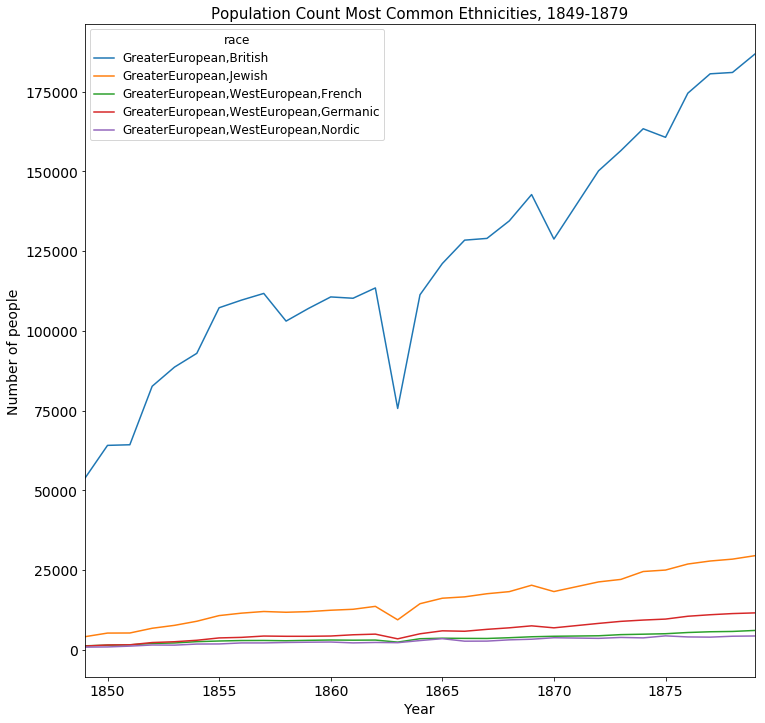

In [12]:
fig, ax = plt.subplots(figsize=(12,12))
eth_top_5[['race','LastName','validSince']].groupby(['validSince', 'race']).count()['LastName'].unstack().plot(ax=ax)

plt.xlabel('Year',fontsize=14.0)
plt.ylabel('Number of people',fontsize=14.0)
plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)

leg = ax.get_legend()
# leg.set_bbox_to_anchor((0.1,0.2,0.2,0.8))
plt.setp(ax.get_legend().get_texts(),fontsize='12.0')
plt.setp(ax.get_legend().get_title(),fontsize='12.0')

plt.title('Population Count Most Common Ethnicities, 1849-1879',fontsize=15.0)
plt.savefig('The top5 races.png')

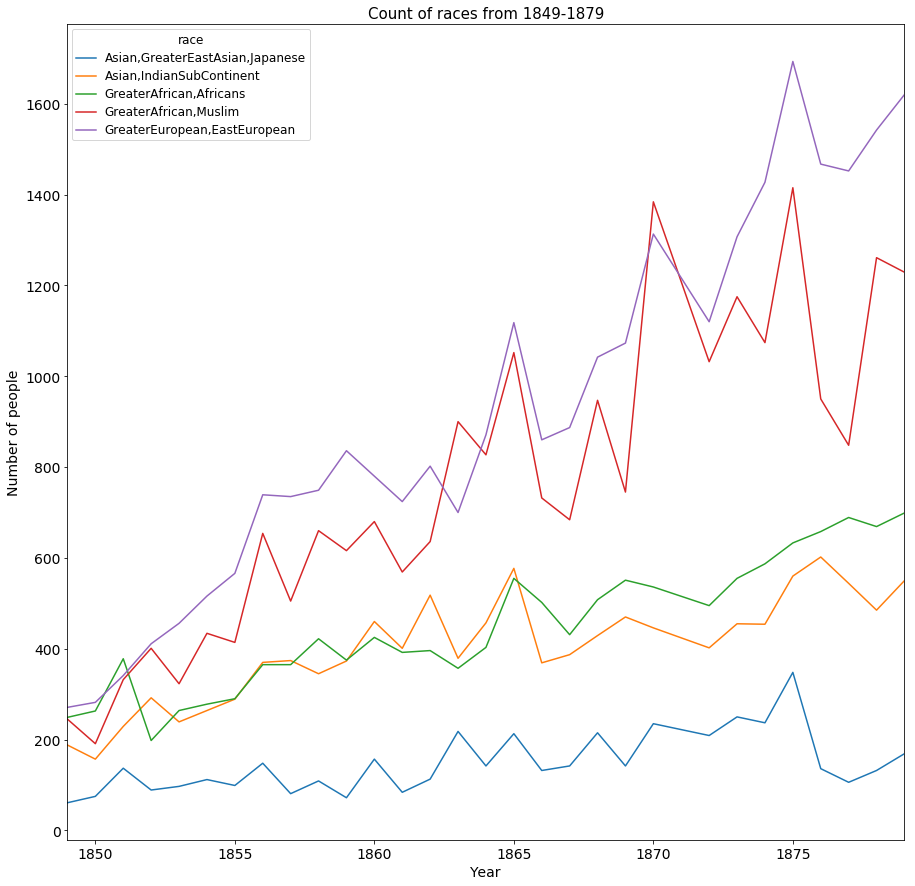

In [684]:
fig, ax = plt.subplots(figsize=(15,15))
eth_bottom_5[['race','LastName','validSince']].groupby(['validSince', 'race']).count()['LastName'].unstack().plot(ax=ax)

plt.xlabel('Year',fontsize=14.0)
plt.ylabel('Number of people',fontsize=14.0)
plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)

leg = ax.get_legend()
# leg.set_bbox_to_anchor((0.1,0.2,0.2,0.8))
plt.setp(ax.get_legend().get_texts(),fontsize='12.0')
plt.setp(ax.get_legend().get_title(),fontsize='12.0')

plt.title('Count of races from 1849-1879',fontsize=15.0)
plt.savefig('The bottom 5 races.png')

In [13]:
eth_counts = eth_df[['race','LastName','validSince']].groupby(['race','validSince']).count()

In [14]:
eth_df_geo.head()

,Unnamed: 0,LastName,FirstName,validSince,$.data.occupation,geometry,race
1,1,Pope,James,1849,mason,"{""type"":""Point"",""coordinates"":[-74.00276988744...","GreaterEuropean,British"
3,3,Pope,Joseph,1849,soda water,"{""type"":""Point"",""coordinates"":[-73.99623423814...","GreaterEuropean,British"
5,5,Pope,Joshua,1849,mer,"{""type"":""Point"",""coordinates"":[-74.00563426315...","GreaterEuropean,British"
20,20,Porcher,Wiltiam,1849,hat finisher,"{""type"":""Point"",""coordinates"":[-73.99672418832...","GreaterEuropean,British"
23,23,Port,George,1849,shoemaker,"{""type"":""Point"",""coordinates"":[-73.99619171395...","GreaterEuropean,British"


In [15]:
eth_df_geo[['race','LastName','validSince']].groupby(['race']).count()

,LastName,validSince
race,,
"Asian,GreaterEastAsian,EastAsian",12293,12293
"Asian,GreaterEastAsian,Japanese",716,716
"Asian,IndianSubContinent",3146,3146
"GreaterAfrican,Africans",3529,3529
"GreaterAfrican,Muslim",4715,4715
"GreaterEuropean,British",1031931,1031931
"GreaterEuropean,EastEuropean",7256,7256
"GreaterEuropean,Jewish",135229,135229
"GreaterEuropean,WestEuropean,French",29386,29386


In [16]:
eth_df_geo['geometry'].head()

1     {"type":"Point","coordinates":[-74.00276988744...
3     {"type":"Point","coordinates":[-73.99623423814...
5     {"type":"Point","coordinates":[-74.00563426315...
20    {"type":"Point","coordinates":[-73.99672418832...
23    {"type":"Point","coordinates":[-73.99619171395...
Name: geometry, dtype: object

In [13]:
import geopandas as gpd

In [14]:
occ_gdf = gpd.GeoDataFrame(eth_df_geo['geometry'])

In [15]:
eth_df_geo.geometry.values.tolist()[0].split("coordinates")[-2:]

['{"type":"Point","', '":[-74.002769887447,40.73324395257066]}']

In [16]:
longitudes = [d.split("coordinates")[-1].split(',')[0] for d in eth_df_geo.geometry.values.tolist()]

In [17]:
longitudes1 = [d.split("coordinates")[-1].split(',:[')[0] for d in eth_df_geo.geometry.values.tolist()]

In [18]:
latitudes = [d.split("coordinates")[-1].split(',')[1] for d in eth_df_geo.geometry.values.tolist()]

In [19]:
latitude_clean = [latitude.replace(']}','').replace(']','') for latitude in latitudes]

In [20]:
longitudes_clean = [longitude.split(':[')[1].replace('[','') for longitude in longitudes]

In [21]:
long_df = pd.DataFrame(longitudes_clean,columns=['longitude'])
lat_df = pd.DataFrame(latitude_clean,columns=['latitude'])
coords = pd.concat([eth_df_geo,long_df,lat_df],axis=1)

In [22]:
coords_lonlat = pd.concat([long_df,lat_df],axis=1)

In [23]:
coords_gpd = gpd.GeoDataFrame(coords_lonlat) 

In [24]:
coords_gpd['longitude'] = coords_gpd['longitude'].astype(float)
coords_gpd['latitude'] = coords_gpd['latitude'].astype(float)

In [25]:
coords_gpd['lonlat'] = list(zip(coords_gpd.longitude,coords_gpd.latitude ))

In [26]:
coords_gpd['geometry'] = coords_gpd[['lonlat']].dropna().applymap(lambda x:Point(x))

In [27]:
len(long_df),len(lat_df)

(1326048, 1326048)

In [28]:
eth_gdf = gpd.GeoDataFrame(eth_df_geo)

In [29]:
coords_lonlat1 = pd.concat([long_df,lat_df],axis=1)

coords_gpd1 = gpd.GeoDataFrame(coords_lonlat) 
coords_gpd1['longitude'] = coords_gpd1['longitude'].astype(float)
coords_gpd1['latitude'] = coords_gpd1['latitude'].astype(float)

In [30]:
coords_gpd1['geometry'] = coords_gpd[['lonlat']].dropna().applymap(lambda x:Point(x))

In [31]:
eth_gdf.drop(['geometry','Unnamed: 0'],axis=1,inplace=True)

In [32]:
eth_gdf.rename(columns={'$.data.occupation' : 'occupation'},inplace=True)

In [33]:
eth_gdf.reset_index(inplace=True)

In [34]:
gdf_please = gpd.GeoDataFrame(pd.concat([eth_gdf,coords_gpd1],axis=1))

In [35]:
gdf_please.head()

,index,LastName,FirstName,validSince,occupation,race,longitude,latitude,lonlat,geometry
0,1,Pope,James,1849,mason,"GreaterEuropean,British",-74.002770,40.733244,"(-74.0027698874, 40.7332439526)",POINT (-74.002769887447 40.73324395257066)
1,3,Pope,Joseph,1849,soda water,"GreaterEuropean,British",-73.996234,40.715684,"(-73.9962342381, 40.7156844035)",POINT (-73.99623423814732 40.71568440347099)
2,5,Pope,Joshua,1849,mer,"GreaterEuropean,British",-74.005634,40.704991,"(-74.0056342632, 40.7049908336)",POINT (-74.00563426315767 40.70499083357134)
3,20,Porcher,Wiltiam,1849,hat finisher,"GreaterEuropean,British",-73.996724,40.739734,"(-73.9967241883, 40.7397342956)",POINT (-73.996724188328 40.73973429562)
4,23,Port,George,1849,shoemaker,"GreaterEuropean,British",-73.996192,40.740424,"(-73.996191714, 40.7404241601)",POINT (-73.99619171395875 40.740424160075)


In [36]:
gdf_please.crs = from_epsg(4326)

In [37]:
gdf_please.to_crs(epsg=2263,inplace=True)

In [38]:
import urllib
import requests
url = "https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile"
urllib.request.urlretrieve(url, "file1.gz")


('file1.gz', <http.client.HTTPMessage at 0x7f732120d0f0>)

In [39]:
!unzip file1.gz


Archive:  file1.gz
  inflating: geo_export_e0f0bdf2-63f2-4e0a-ba2b-ebd56aad67dc.dbf  
  inflating: geo_export_e0f0bdf2-63f2-4e0a-ba2b-ebd56aad67dc.shp  
  inflating: geo_export_e0f0bdf2-63f2-4e0a-ba2b-ebd56aad67dc.shx  
  inflating: geo_export_e0f0bdf2-63f2-4e0a-ba2b-ebd56aad67dc.prj  


In [40]:
url_ct = "https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=Shapefile"
urllib.request.urlretrieve(url_ct, "file2.gz")


('file2.gz', <http.client.HTTPMessage at 0x7f732120d2e8>)

In [41]:
!unzip file2.gz


Archive:  file2.gz
  inflating: geo_export_6207fa8f-7c7f-4b01-885c-106a15ade2e9.dbf  
  inflating: geo_export_6207fa8f-7c7f-4b01-885c-106a15ade2e9.shp  
  inflating: geo_export_6207fa8f-7c7f-4b01-885c-106a15ade2e9.shx  
  inflating: geo_export_6207fa8f-7c7f-4b01-885c-106a15ade2e9.prj  


In [42]:
gdf_ct = gpd.GeoDataFrame.from_file("geo_export_6207fa8f-7c7f-4b01-885c-106a15ade2e9.shp")

In [43]:
gdf_ct.to_crs(epsg=2263, inplace=True)
coords_gdf.head()

In [45]:
sj_output2 = gpd.sjoin(gdf_ct,gdf_please,how='inner')

In [ ]:
eth_observed= top_5 only
years = [1850, 1855, 1860, 1865, 1870, 1875, 1879]
ethnicities =[]
GreaterEuropean,British	3644364	3644364
GreaterEuropean,Jewish	470959	470959
GreaterEuropean,WestEuropean,Germanic	174672	174672
GreaterEuropean,WestEuropean,French	104964	104964
GreaterEuropean,WestEuropean,Nordic

In [47]:
sj_test = sj_output2

In [48]:
sj_test.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,...,index_right,index,LastName,FirstName,validSince,occupation,race,longitude,latitude,lonlat
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,244048,538669,Law,Robert,1854,mason,"GreaterEuropean,British",-73.969168,40.757753,"(-73.9691681229, 40.7577525929)"
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,588113,1589607,Gruebner,Sophia,1862,wid . John,"GreaterEuropean,WestEuropean,Germanic",-73.969168,40.757753,"(-73.9691681229, 40.7577525929)"
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,162311,354172,Law,Robert,1853,mason,"GreaterEuropean,British",-73.969168,40.757753,"(-73.9691681229, 40.7577525929)"
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,134379,290664,Forsyth,Robert,1852,smith,"GreaterEuropean,British",-73.969168,40.757753,"(-73.9691681229, 40.7577525929)"
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,305547,674486,Greiner,John,1856,sawyer,"GreaterEuropean,British",-73.969168,40.757753,"(-73.9691681229, 40.7577525929)"


In [400]:
asian_ea = sj_test[sj_test['race'] == 'GreaterEuropean,WestEuropean,Nordic']
asian_ea_1850 = asian_ea[asian_ea['validSince'] == 1850]
asian_ea_1855 = asian_ea[asian_ea['validSince'] == 1855]
asian_ea_1860 = asian_ea[asian_ea['validSince'] == 1860]
asian_ea_1865 = asian_ea[asian_ea['validSince'] == 1865]
asian_ea_1870 = asian_ea[asian_ea['validSince'] == 1870]
asian_ea_1875 = asian_ea[asian_ea['validSince'] == 1875]
asian_ea_1879 = asian_ea[asian_ea['validSince'] == 1879]

In [401]:
gp_1850 = asian_ea_1850[['ct2010','validSince']].groupby(['ct2010']).count()
gp_1855 = asian_ea_1855[['ct2010','validSince']].groupby(['ct2010']).count()
gp_1860 = asian_ea_1860[['ct2010','validSince']].groupby(['ct2010']).count()
gp_1865 = asian_ea_1865[['ct2010','validSince']].groupby(['ct2010']).count()
gp_1870 = asian_ea_1870[['ct2010','validSince']].groupby(['ct2010']).count()
gp_1875 = asian_ea_1875[['ct2010','validSince']].groupby(['ct2010']).count()
gp_1879 = asian_ea_1879[['ct2010','validSince']].groupby(['ct2010']).count()

In [402]:
gp_1850['std_count'] = (gp_1850['validSince'] - gp_1850['validSince'].mean()) / gp_1850['validSince'].std()
gp_1855['std_count'] = (gp_1855['validSince'] - gp_1855['validSince'].mean()) / gp_1855['validSince'].std()
gp_1860['std_count'] = (gp_1860['validSince'] - gp_1860['validSince'].mean()) / gp_1860['validSince'].std()

gp_1865['std_count'] = (gp_1865['validSince'] - gp_1865['validSince'].mean()) / gp_1865['validSince'].std()
gp_1870['std_count'] = (gp_1870['validSince'] - gp_1870['validSince'].mean()) / gp_1870['validSince'].std()
gp_1875['std_count'] = (gp_1875['validSince'] - gp_1875['validSince'].mean()) / gp_1875['validSince'].std()
gp_1879['std_count'] = (gp_1879['validSince'] - gp_1879['validSince'].mean()) / gp_1879['validSince'].std()

In [403]:
pl_1850 = gdf_ct.merge(gp_1850,left_on='ct2010', right_index=True)
pl_1855 = gdf_ct.merge(gp_1855,left_on='ct2010', right_index=True)
pl_1860 = gdf_ct.merge(gp_1860,left_on='ct2010', right_index=True)
pl_1865 = gdf_ct.merge(gp_1865,left_on='ct2010', right_index=True)
pl_1870 = gdf_ct.merge(gp_1870,left_on='ct2010', right_index=True)
pl_1875 = gdf_ct.merge(gp_1875,left_on='ct2010', right_index=True)
pl_1879 = gdf_ct.merge(gp_1879,left_on='ct2010', right_index=True)



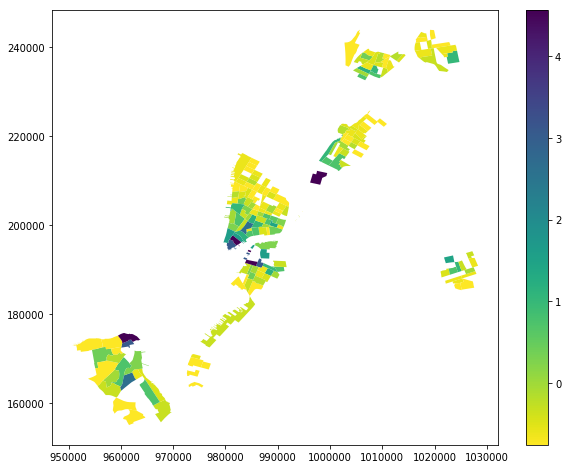

In [404]:
fig,ax = plt.subplots(figsize=(10,8))
pl_1850.plot(column='std_count',cmap='viridis_r',ax=ax,legend=True)
plt.legend()

In [405]:
path='pl_1850.shp'
pl_1850.to_file(path)

In [406]:
path='pl_1855.shp'
pl_1855.to_file(path)

path='pl_1860.shp'
pl_1860.to_file(path)

path='pl_1865.shp'
pl_1865.to_file(path)

path='pl_1870.shp'
pl_1870.to_file(path)

path='pl_1875.shp'
pl_1875.to_file(path)

path='pl_1879.shp'
pl_1879.to_file(path)

In [462]:
path='pl_1879.shp'
qW_CT=ps.queen_from_shapefile(path)

Island ids:  [4, 5, 27, 28, 30, 58, 78, 94, 95, 165, 198, 227]


In [463]:
Wmatrix, ids = qW_CT.full()
qW_CT.transform = 'r'
total_eth = pl_1879.std_count
total_ethLag =ps.lag_spatial(qW_CT, total_eth)


In [464]:
total_ethQ10 = ps.Quantiles(total_ethLag, k=10)
total_ethQ10

               Quantiles                
 
Lower            Upper             Count
         x[i] <= -0.620               26
-0.620 < x[i] <= -0.550               23
-0.550 < x[i] <= -0.460               25
-0.460 < x[i] <= -0.357               24
-0.357 < x[i] <= -0.199               24
-0.199 < x[i] <=  0.000               25
 0.000 < x[i] <=  0.325               24
 0.325 < x[i] <=  0.669               24
 0.669 < x[i] <=  0.957               23
 0.957 < x[i] <=  2.728               26

In [465]:
I_total_eth = ps.Moran(total_eth, qW_CT)

In [466]:
I_total_eth.I, I_total_eth.p_sim

(0.33596656698058586, 0.001)

In [467]:
LMo_eth = ps.Moran_Local(total_eth.values, qW_CT ,permutations=999)


In [468]:
sigs = total_eth[LMo_eth.p_sim <= .001]
W_sigs = total_eth[LMo_eth.p_sim <= .001]
insigs = total_eth[LMo_eth.p_sim > .001]
W_insigs = total_eth[LMo_eth.p_sim > .001]

In [469]:
sig = LMo_eth.p_sim < 0.01
hotspots = LMo_eth.q==1 * sig
coldspots = LMo_eth.q==3 * sig

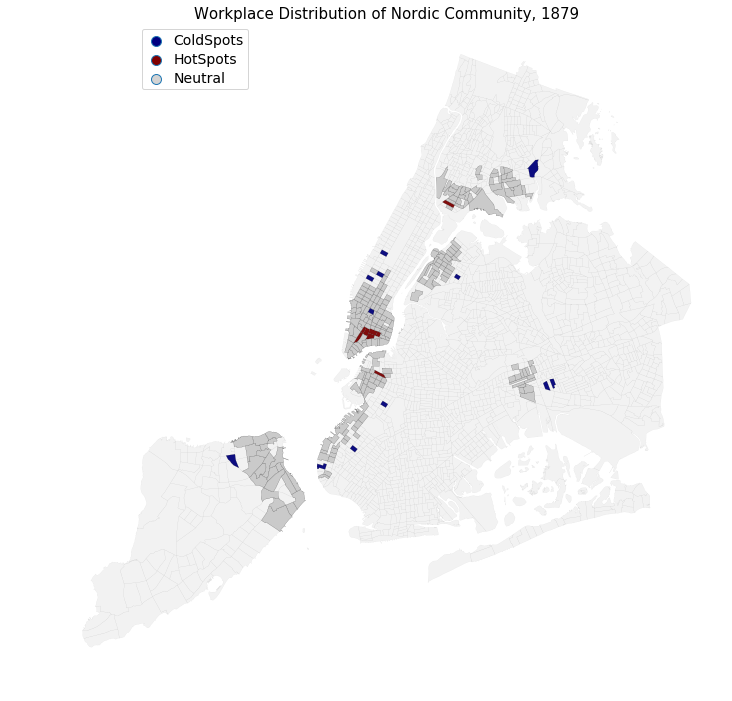

In [470]:
from matplotlib import colors

hcmap = colors.ListedColormap(['navy','maroon','lightgrey'])
hotcold = hotspots*1 + coldspots*2
HotCold_Categories2=[]
for i in range(len(hotcold)):
    if hotcold[i] == 0:
        HotCold_Categories2.append('Neutral')
    elif hotcold[i] == 1:
        HotCold_Categories2.append('HotSpots')
    else:
        HotCold_Categories2.append('ColdSpots')
        
    

f, ax = plt.subplots(figsize=(12,12))

pl_1879.assign(cl=HotCold_Categories2).plot(column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='black',legend=True)
gdf_ct.plot(linewidth=0.2, 
        edgecolor='black', alpha=0.1,color='grey',ax=ax
            )
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1,0.2,0.2,0.8))
plt.setp(ax.get_legend().get_texts(),fontsize='14.0')

plt.title("Workplace Distribution of Nordic Community, 1879",fontsize=15.0);

plt.savefig('Nordic_eth_1879.png')


In [93]:
leg.set_label?